In [1]:
# !pip install tensorflow==2.0.0
# !pip install tf-nightly
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import re
import tensorflow
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')

Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
dataset = pd.read_csv('sms_data.csv',encoding = "cp1252")

In [4]:
dataset.head(5)

,Label,Message
0,Delivery,"Dear Guest, Thanks for choosing The Edison. Or..."
1,Hotel,Welcome to Southern University at Shreveport R...
2,Payment,Bill dated 2013-01-14 for Rs 626 has been gene...
3,Payment,Bill dated 2014-11-30 for Rs 323 has been gene...
4,Appointment,"DEAR Zachary, THANK YOU FOR YOUR BOOKING (ORDE..."


In [5]:
dataset["Label"]

0           Delivery
1              Hotel
2            Payment
3            Payment
4        Appointment
            ...     
12994           spam
12995           info
12996           info
12997           spam
12998           info
Name: Label, Length: 12999, dtype: object

In [6]:
for i in range(len(dataset["Message"])):
  if dataset["Label"][i] == 'Payment':
    dataset["Label"][i] = "financial"
  elif dataset["Label"][i] == "PickUp":
    dataset["Label"][i] = "financial"
  elif dataset["Label"][i] == "Train":
    dataset["Label"][i] = "financial"
  elif dataset["Label"][i] == "bank":
    dataset["Label"][i] = "financial"
  elif dataset["Label"][i] == "financial":
    dataset["Label"][i] = "financial"
  elif dataset["Label"][i] == "Expiry" :
    dataset["Label"][i] = "financial"
  else:
    dataset["Label"][i] = "nonfinancial"

In [7]:
dataset.tail(15)

,Label,Message
12984,nonfinancial,Delivered: Your package with Introductory Offe...
12985,nonfinancial,* KSRTC m-Ticket * from: MANTRALAYA to: KIAL ...
12986,nonfinancial,Delivered: Your package withNikon AF-S DX Nikk...
12987,nonfinancial,"Greetings, IDBI Bank wishes you a Happy Ganesh..."
12988,nonfinancial,"[Mini Kalzone] Hi Edwin, your reservation is c..."
12989,nonfinancial,"Dear INDIGO Customer, flight 5F212 from WGC sh..."
12990,financial,Bill dated 2011-03-19 for Rs 304 has been gene...
12991,nonfinancial,to discuss about project
12992,nonfinancial,"IM-PLOANS, 30/06/2016, HDFC BANK PERSONAL LOAN..."
12993,financial,OTP is 545125 for the txn of INR 14189.00 at J...


In [8]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "cause": "because", "could've": "could have","this's" : "this is"}

In [9]:
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re
contractions, contractions_re = _get_contractions(contraction_dict)
def replace_contractions(text):
  def replace(match):
    return contractions[match.group(0)]
  return contractions_re.sub(replace, text)

In [10]:
for msg in dataset["Message"] :
  replace_contractions(msg)

In [11]:
def clean_data(x):
  punctuation = '.!"#$%&()*+-/:,;<=>?@[\\]^_`{|}~'
  x = x.apply(lambda x: ''.join(ch for ch in x if ch not in set(punctuation)))
  x = x.str.lower()
  x = x.str.replace("[0-9]", " ")
  x = x.apply(lambda x: ' '.join(x.split()))
  return x

In [12]:
cleaned = clean_data(dataset["Message"])
dataset["Message"] = cleaned

In [13]:
dataset["Message"]

0        dear guest thanks for choosing the edison orde...
1        welcome to southern university at shreveport r...
2        bill dated for rs has been generated for your ...
3        bill dated for rs has been generated for your ...
4        dear zachary thank you for your booking order ...
                               ...                        
12994    great taste offers get off with code ruush off...
12995    thank you for choosing taxiforsure for at cabk...
12996    bill dated for rs has been generated for your ...
12997    dear indigo customer flight s from isk shall b...
12998    thank you for using your hdfc bank debitcard e...
Name: Message, Length: 12999, dtype: object

In [14]:
cleaned2=[]
for msg in cleaned:
  cleaned2.append(nltk.word_tokenize(msg))

In [15]:
dataset["Message"] = cleaned2

In [16]:
dataset["Message"]

0        [dear, guest, thanks, for, choosing, the, edis...
1        [welcome, to, southern, university, at, shreve...
2        [bill, dated, for, rs, has, been, generated, f...
3        [bill, dated, for, rs, has, been, generated, f...
4        [dear, zachary, thank, you, for, your, booking...
                               ...                        
12994    [great, taste, offers, get, off, with, code, r...
12995    [thank, you, for, choosing, taxiforsure, for, ...
12996    [bill, dated, for, rs, has, been, generated, f...
12997    [dear, indigo, customer, flight, s, from, isk,...
12998    [thank, you, for, using, your, hdfc, bank, deb...
Name: Message, Length: 12999, dtype: object

In [17]:
#  def stopwords_remove(data):
#    data.apply(lambda x: [item for item in x if item not in stop])
#    return data
   

In [18]:
# dataset["Message"] = stopwords_remove(dataset["Message"])

In [19]:
dataset["Message"].head
sentences = []
for word_list in dataset["Message"]:
  sentences.append(" ".join(word_list))

In [20]:
dataset["Message"] = sentences

In [21]:
dataset["Message"][0]

'dear guest thanks for choosing the edison order id delivery by enjoy discount on your next purchase code nl j tc'

In [22]:
tokenizer = Tokenizer(num_words=5000)

In [23]:
tokenizer.fit_on_texts(dataset["Message"])

In [24]:
tokenizer

In [25]:
X = tokenizer.texts_to_sequences(dataset["Message"])

In [26]:
vocab_size = len(tokenizer.word_index) + 1

In [27]:
#tokenizer.word_index

In [28]:
print(vocab_size)

11064


In [29]:
print(dataset["Message"][0])

dear guest thanks for choosing the edison order id delivery by enjoy discount on your next purchase code nl j tc


In [30]:
print(X[0])

[39, 86, 53, 1, 30, 11, 3142, 35, 9, 82, 26, 75, 83, 4, 2, 55, 76, 73, 1848, 41, 12]


In [31]:
maxlen = 50
X = pad_sequences(X, padding='post', maxlen=maxlen)
print(X[2, :])

[ 97 116   1  20  42  43 115   1   2 217 117 118  23  11 113  21  34   6
  26  31 114   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [32]:
Y = pd.get_dummies(dataset['Label'])

In [33]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(9099, 50) (9099, 2)
(3900, 50) (3900, 2)


In [34]:
Y_train

,financial,nonfinancial
2514,0,1
11732,0,1
7134,0,1
9365,0,1
9527,0,1
...,...,...
11964,0,1
5191,1,0
5390,0,1
860,0,1


In [35]:
# Y_test = np.asarray(Y_train).astype('float32').reshape((-1,1))

In [36]:
# Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))

In [37]:
# embedding_dim = 50
# model = Sequential()
# model.add(layers.Embedding(input_dim=vocab_size, 
#                            output_dim=embedding_dim,input_length=maxlen))
# model.add(layers.Flatten())
# # model.add(layers.Dropout(0.2))
# # model.add(layers.Dense(50, activation='relu'))
# # model.add(layers.Dropout(0.2))
# model.add(layers.Dense(50, activation='relu'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Dense(25, activation='relu'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Dense(Y.shape[1], activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.summary()

In [38]:
# callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)
# history = model.fit(X_train,Y_train, batch_size=25 ,validation_split=0.1,epochs=25, callbacks=[callback])

In [39]:
# score, acc = model.evaluate(X_test, Y_test,
#                             batch_size=50)
# print('Test score:', score)
# print('Test accuracy:', acc)

In [40]:
# print(history.history.keys())
# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [41]:
# accr = model.evaluate(X_test,Y_test)
# print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

In [42]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [43]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('drive/My Drive/glove.6B.50d.txt',tokenizer.word_index, embedding_dim)

In [44]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.4497469269703543

In [45]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
# model.add(layers.Dense(50, activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1_l2(0.01)))
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(25, activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.01)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(Y_train.shape[1], activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 50)            553200    
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 52        
Total params: 554,527
Trainable params: 1,327
Non-trainable params: 553,200
_________________________________________________________________


In [46]:
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001)
history = model.fit(X_train,Y_train, batch_size=25 ,validation_split=0.2,epochs=50, callbacks=[callback])

Epoch 1/50
292/292 [==============================] - 1s 2ms/step - loss: 1.3443 - accuracy: 0.8413 - val_loss: 0.6483 - val_accuracy: 0.9841
Epoch 2/50
292/292 [==============================] - 1s 2ms/step - loss: 0.4863 - accuracy: 0.9586 - val_loss: 0.3665 - val_accuracy: 0.9830
Epoch 3/50
292/292 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.9676 - val_loss: 0.3005 - val_accuracy: 0.9824
Epoch 4/50
292/292 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.9706 - val_loss: 0.2677 - val_accuracy: 0.9813
Epoch 5/50
292/292 [==============================] - 0s 2ms/step - loss: 0.2803 - accuracy: 0.9694 - val_loss: 0.2448 - val_accuracy: 0.9808
Epoch 6/50
292/292 [==============================] - 1s 2ms/step - loss: 0.2606 - accuracy: 0.9710 - val_loss: 0.2336 - val_accuracy: 0.9797
Epoch 7/50
292/292 [==============================] - 1s 2ms/step - loss: 0.2527 - accuracy: 0.9692 - val_loss: 0.2189 - val_accuracy: 0.9835
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


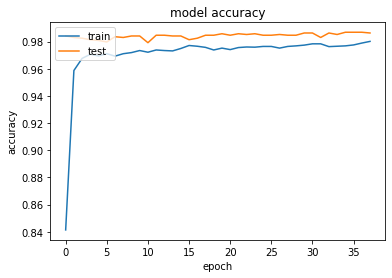

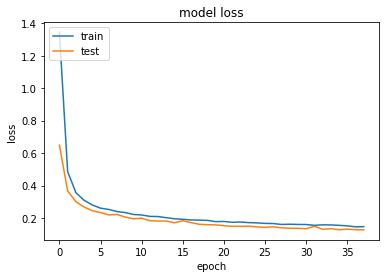

In [47]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9855
Testing Accuracy:  0.9826
